### Assignment 5.1: IMDB Movie Classifier

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.datasets import imdb
from keras import losses
from keras import metrics

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**Vectorize Data**

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Building the Network**

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

**Validation Set**

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the Model**

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 175ms/step - loss: 0.5021 - acc: 0.7969 - val_loss: 0.3771 - val_acc: 0.8709
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2973 - acc: 0.9022 - val_loss: 0.3072 - val_acc: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2177 - acc: 0.9281 - val_loss: 0.3106 - val_acc: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1718 - acc: 0.9454 - val_loss: 0.2914 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2841 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1169 - acc: 0.9634 - val_loss: 0.2981 - val_acc: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0976 - acc: 0.9713 - val_loss: 0.3127 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0782 - 

**Training and Validation Loss**

In [24]:
history_dict = history.history

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [30]:
epochs = range(1, 21)

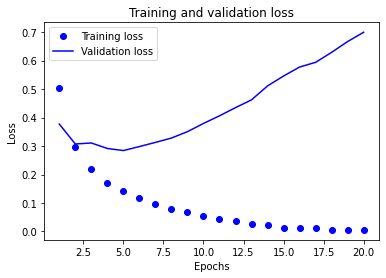

In [31]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training and Validation Accuracy**

In [32]:
plt.clf() 

<Figure size 432x288 with 0 Axes>

In [35]:
acc = history_dict['acc'] 
val_acc = history_dict['val_acc']

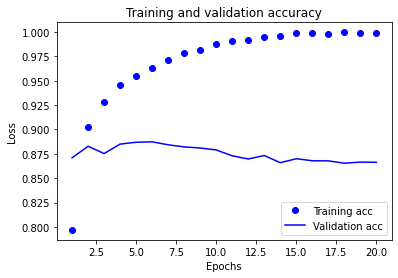

In [37]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Results**

In [39]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.7563 - acc: 0.8517


[0.7562754154205322, 0.8516799807548523]

The model has an 85.17% accuracy.